In [1]:
import numpy as np
from numpy import percentile
from numpy import mean
from numpy import std
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from sklearn import preprocessing

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from bs4 import BeautifulSoup
import requests
import math

from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score

from kmodes.kmodes import KModes
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from functools import reduce
from sklearn.metrics import accuracy_score


import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')

In [5]:
df = pd.read_csv('customer survey.csv')

In [6]:
df['bichoice'].value_counts()

1    3244
0    2654
Name: bichoice, dtype: int64

In [7]:
df.head()

,subject,scenario,bichoice,comb,priceprop,range,home_chg,work_chg,fasttime,town,...,used_car_owner,used_ev_owner,used,price,numprice,PopDensity,orphan,ev_owner,freq,priceshow
0,1,25,1,6468,0.70,100,0,0,15,10,...,1,0,1,"$10,000",10000,290.5478,1,0,6,7000
1,1,44,0,13191,0.70,400,20,3,15,15,...,1,0,1,"$10,000",10000,290.5478,1,0,6,7000
2,1,10,1,21921,0.70,200,0,10,30,15,...,1,0,1,"$10,000",10000,290.5478,1,0,6,7000
3,1,35,1,32501,0.85,300,0,10,5,15,...,1,0,1,"$10,000",10000,290.5478,1,0,6,8500
4,1,111,0,12360,0.70,100,20,20,30,15,...,1,0,1,"$10,000",10000,290.5478,1,0,6,7000


In [8]:
df.columns

Index(['subject', 'scenario', 'bichoice', 'comb', 'priceprop', 'range',
       'home_chg', 'work_chg', 'fasttime', 'town', 'highway', 'rzip', 'gender',
       'race', 'state_answer', 'license', 'edu', 'employment', 'hsincome',
       'hhsize', 'housit', 'residence', 'move', 'all_car', 'new_car', 'ev',
       'new_ev', 'home_parking', 'hp2', 'hp3', 'hp4', 'hp5', 'hp6',
       'home_evse', 'work_parking', 'work_evse', 'buycar', 'zipcode',
       'dmileage', 'long_dist', 'gascost', 'age', 'used_car_owner',
       'used_ev_owner', 'used', 'price', 'numprice', 'PopDensity', 'orphan',
       'ev_owner', 'freq', 'priceshow'],
      dtype='object')

In [1182]:
df.describe()

,scenario,bichoice,comb,priceprop,range,home_chg,work_chg,fasttime,town,highway,...,used_car_owner,used_ev_owner,used,numprice,PopDensity,orphan,ev_owner,freq,priceshow,home_park
count,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.00000,5802.000000,5802.000000,5802.000000,...,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.0,5802.000000,5802.000000
mean,120.714581,0.550327,18782.073078,0.851913,250.775595,5.949155,5.90779,27.613754,2.504998,2.501724,...,0.645295,0.011375,0.539814,22838.676319,2965.253951,1.258532,0.074457,6.0,19462.771458,1.717684
std,70.283615,0.497504,10853.075306,0.121612,111.067837,6.606871,6.57716,20.731900,1.125801,1.115660,...,0.478465,0.106056,0.498455,11408.306499,7048.979196,0.503770,0.262536,0.0,10184.756437,1.148781
min,1.000000,0.000000,66.000000,0.700000,100.000000,0.000000,0.00000,5.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,5000.000000,2.337699,1.000000,0.000000,6.0,3500.000000,0.000000
25%,60.000000,0.000000,9592.000000,0.700000,200.000000,1.000000,1.00000,15.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,15000.000000,306.985300,1.000000,0.000000,6.0,10500.000000,1.000000
50%,120.000000,1.000000,19113.000000,0.850000,300.000000,3.000000,3.00000,30.000000,3.000000,2.000000,...,1.000000,0.000000,1.000000,20000.000000,1261.546000,1.000000,0.000000,6.0,17500.000000,1.000000
75%,182.000000,1.000000,28220.000000,1.000000,300.000000,10.000000,10.00000,60.000000,4.000000,3.000000,...,1.000000,0.000000,1.000000,30000.000000,3532.618000,1.000000,0.000000,6.0,25500.000000,3.000000
max,240.000000,1.000000,37574.000000,1.000000,400.000000,20.000000,20.00000,60.000000,4.000000,4.000000,...,1.000000,1.000000,1.000000,50000.000000,128440.800000,3.000000,1.000000,6.0,50000.000000,4.000000


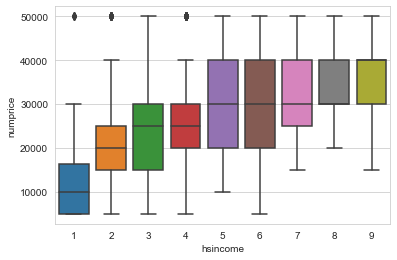

In [7]:
# Seeing if there is any relationships with income and budget
sns.boxplot(x='hsincome',y='numprice',data=df)

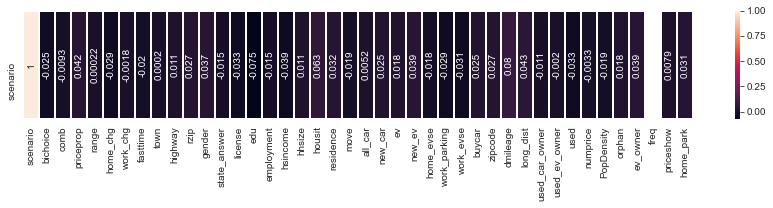

In [26]:
# Correlation on Buy Choice 
plt.figure(figsize=(15,2))
sns.heatmap(df.corr().head(1),annot = True ,annot_kws={"rotation":90}, lw = 1)

Correlation doesn't seem to show a intuitive interpretation for the buy choice 

# Feature Engineering

In [9]:
#Dropping Unecessary Columns
df.drop(['subject','race','price'],axis=1,inplace=True)

In [10]:
# Town feature
dmap = {'no': 4, '15':3, '10':2,'5':1}
df['town'] = df['town'].map(dmap)

#Highway Feature
dmap2 = {'no': 4, '70':3, '50':2, '30':1}
df['highway'] = df['highway'].map(dmap2)

#License Feature 
dmap3 = {'Yes':1,'No':0}
df['license'] = df['license'].map(dmap3)

# We are going to group ages into 6 different sections
bin = [19,29,39,49,59,69,79] # Age Group
label = [1,2,3,4,5,6]# Label for Age group
df['age'] = pd.cut(df['age'],bins=bin,labels=label)
df['age'].fillna(2,inplace=True) #filling the NaN with Mode

bins = [-1,100,200,301]
labels = [1,2,3]
df['gascost'] = pd.cut(df['gascost'],bins=bins,labels=labels)

In [11]:
# Label Encoding Method for State_answer colum which contains 49 different states
# The label is assigned based on the alphabetical order of States (Alabama --> W)
le = preprocessing.LabelEncoder()
le.fit(df['state_answer'])

df['state_answer'] = le.transform(df['state_answer'])

In [12]:
# home parking situation answers were located in different columns
home_park = df[['home_parking', 'hp2', 'hp3','hp4', 'hp5']]

In [13]:
# Function that combines all the columns that shows the answer for each individual
def feat_eng(data):        
    for i in home_park[home_park['home_parking'].isnull()]['home_parking'].index:
        if i in home_park[home_park[data].notnull()][data].index:
            home_park['home_parking'].iloc[i] = home_park[data].value_counts().keys()[0]
    return home_park['home_parking'].value_counts()

In [14]:
# looping all the columns and fill in the NaN value with the answer
for i in home_park.columns[1:]:
    feat_eng(i)

In [15]:
#Checking if all the values are in the same columns
home_park['home_parking'].value_counts()

Attached garage           2520
Driveway or carport       1782
Assigned parking space     702
Detached garage            546
On street                  252
Name: home_parking, dtype: int64

In [16]:
df.drop(['home_parking','hp2','hp2','hp3','hp4','hp5','hp6'],axis=1,inplace=True)
df['home_park'] = home_park['home_parking']

In [17]:
df.dropna(inplace=True)

In [18]:
# Feature engineering for home_park feature
le = preprocessing.LabelEncoder()
le.fit(df['home_park'])
df['home_park'] = le.transform(df['home_park'])

In [19]:
# Checking with the above value counts if the values match 
df['home_park'].value_counts()

1    2520
3    1782
0     702
2     546
4     252
Name: home_park, dtype: int64

In [20]:
# Checking if all features are transformed into integer
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5802 entries, 0 to 5897
Data columns (total 44 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   scenario        5802 non-null   int64   
 1   bichoice        5802 non-null   int64   
 2   comb            5802 non-null   int64   
 3   priceprop       5802 non-null   float64 
 4   range           5802 non-null   int64   
 5   home_chg        5802 non-null   int64   
 6   work_chg        5802 non-null   int64   
 7   fasttime        5802 non-null   int64   
 8   town            5802 non-null   int64   
 9   highway         5802 non-null   int64   
 10  rzip            5802 non-null   int64   
 11  gender          5802 non-null   int64   
 12  state_answer    5802 non-null   int32   
 13  license         5802 non-null   int64   
 14  edu             5802 non-null   int64   
 15  employment      5802 non-null   int64   
 16  hsincome        5802 non-null   int64   
 17  hhsize        

In [41]:
df.head()

,scenario,bichoice,comb,priceprop,range,home_chg,work_chg,fasttime,town,highway,...,used_car_owner,used_ev_owner,used,numprice,PopDensity,orphan,ev_owner,freq,priceshow,home_park
0,25,1,6468,0.70,100,0,0,15,2,4,...,1,0,1,10000,290.5478,1,0,6,7000,2
1,44,0,13191,0.70,400,20,3,15,3,3,...,1,0,1,10000,290.5478,1,0,6,7000,2
2,10,1,21921,0.70,200,0,10,30,3,2,...,1,0,1,10000,290.5478,1,0,6,7000,2
3,35,1,32501,0.85,300,0,10,5,3,1,...,1,0,1,10000,290.5478,1,0,6,8500,2
4,111,0,12360,0.70,100,20,20,30,3,3,...,1,0,1,10000,290.5478,1,0,6,7000,2


In [42]:
df.to_csv('processed.csv')

# Machine Learning Modeling with Logic

## K-Mode Clustering - Custom Functions

In [5]:
# Feature selection - Use of Chi-squared as method of selection (Due to the Categorical Features only dataset)
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [6]:
# Selecting best K for the K-Mode algorithm, Elbow method plot allow visualization of best k
def selectK (dataframe):
    X = dataframe
    y = df['bichoice']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)
    
    X_train_fs, X_test_fs, fs = select_features(X_train,y_train, X_test)
    
    for i in range(len(fs.scores_)):
        print('Feature %d: %f' % (i, fs.scores_[i]))
    
    pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
    return pyplot.show()

In [7]:
# Function that provides a Elbow Plot to illustrate the best K selection
def k_mode (dataframe):
    cost = []
    K = range(1,6) # will be looping  K = 1 -> 5
    for num_clusters in list(K):
        kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
        kmode.fit_predict(dataframe)
        cost.append(kmode.cost_) #Cost Function for each K
    
    plt.plot(K, cost, 'bx-')
    plt.xlabel('No. of clusters')
    plt.ylabel('Cost')
    plt.title('Elbow Method For Optimal k')
    return plt.show()

In [8]:
# Running the K-mode to the dataframe with the selected K value and add Cluster column to indicate the location of Sample 
# def k_mode_compute(dataframe,numk):
#     kmode = KModes(n_clusters=numk, init = "random", n_init = 5, verbose=1)
#     clusters = kmode.fit_predict(dataframe)
#     dataframe.insert(0, "Cluster", clusters, True)
#     return dataframe

In [9]:
#When the optimal K is found, create a dataframe
def k_mode_compute__(dataframe,numk):
    kmode = KModes(n_clusters=numk, init = "random", n_init = 5, verbose=1)
    clusters = kmode.fit_predict(dataframe)
    a = pd.DataFrame(clusters)
    return a.iloc[:,0].value_counts().to_frame(), a.reset_index() 

# K_mode Clustering Simulation (Frequency Detection)

In [10]:
def simulation(section):
    freq = [] # Value_counts for 3 clusters resulted from given dataframe (Question Sections)
    sample = [] # 5800 Samples corresponds to the value_counts df location
    
    for _ in range(0,100):
        km = k_mode_compute__(section,3)
        freq.append(km[0])
        sample.append(km[1])
    
    # combining Value_counts df for 100 simulation
    data_frames = freq[:]
    result = reduce(lambda df_left,df_right: pd.merge(df_left, df_right, 
                                            left_index=True, right_index=True, #on=['index'],
                                            how='outer'),data_frames)
    
    cl1 = []
    cl2 = []
    cl3 = []
    #Computing the Distance from the Mean
    for i in result.iloc[0].values:
        cl1.append(abs(i - result.iloc[0].mean()))
    for j in result.iloc[1].values:
        cl2.append(abs(j - result.iloc[1].mean()))
    for k in result.iloc[2].values:
        cl3.append(abs(k - result.iloc[2].mean()))
    
    final = zip(cl1,cl2,cl3)
    final_ = [round(sum(item),2) for item in final]
    
    best_val = sample[np.where(min(final_)== final_)[0][0]][0].value_counts()
    best_sample = sample[np.where(min(final_)== final_)[0][0]]
    
    return best_val, best_sample

### Personal Information Section
* gender
* state_answer <- 49 
* edu
* employment
* hsincome : house hold income
* hhsize : house hold size (member of family)
* age: born date
* license: have or not have a valid license
* housit : Housing Situation (Purchased, rent etc..)
* residence : Type of residence
* move : Planning to move out within 3 years

Parking Situation
* home_parking: parking situation at home
* work_parking: parking situation at work
* orphan: garage orphan - doesnt have off-street home parking space or accessible electricity outlets for home 

In [33]:
# Initial Features within the Selected Section for Personal Information
pi = df[['gender','state_answer','edu','employment','hsincome','hhsize','age','license','housit','residence','move','work_parking','home_park','orphan']]

Feature 0: 10.454542
Feature 1: 5.918132
Feature 2: 1.590275
Feature 3: 0.222512
Feature 4: 0.529623
Feature 5: 3.112724
Feature 6: 14.836809
Feature 7: 0.013722
Feature 8: 0.000363
Feature 9: 6.635758
Feature 10: 0.005993
Feature 11: 3.270623
Feature 12: 0.069757
Feature 13: 0.191521


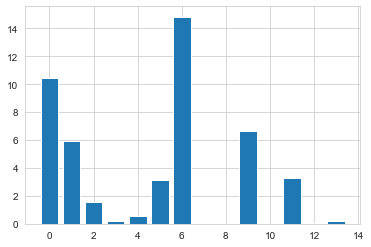

In [34]:
# Feature Selection for Categorical Variable Using Select Best K Algorithm Using Chi-square test score
selectK(pi)

In [35]:
# Selected Features 
pi = df[['gender','state_answer','hsincome','age','work_parking']]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 18186.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 18186.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 18186.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 18186.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 18186.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 102, cost: 16152.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2118, cost: 15360.0
Run 2, iteration: 2/100, moves: 864, cost: 15360.0
Init: initializing 

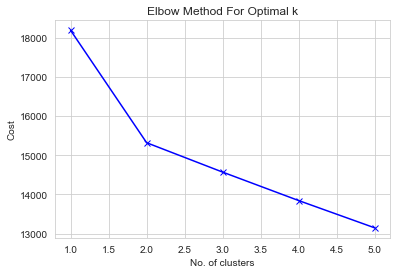

In [36]:
#Generating Elbow Curve to Detremine the best K for K-Mode ML algorithm 
k_mode(pi)

Becuase Clustering Algorithms shows different outcomes everytime we run them, (if we dont state Random State), this is due to the fact that K type algorithm (K-mode and K-means) select the initial K at random, and if the sample size is big, and cluster size is small, it will provide different outcome (Cluster Combination) Every Run, therefore run the simulation to get the Gaussian Distribution and Select the ones that are closest to the mean

In [37]:
#From selected K, run simulation of 100 times to determine the Most Frequent Clustering Combination
freq = [] # Value_counts df
sample = [] # 5800 Samples corresponds to the value_counts df location
for _ in range(0,100):
    km = k_mode_compute__(pi,3)
    freq.append(km[0])
    sample.append(km[1])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2058, cost: 14688.0
Run 1, iteration: 2/100, moves: 114, cost: 14688.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 846, cost: 14262.0
Run 2, iteration: 2/100, moves: 60, cost: 14262.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 774, cost: 15330.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 690, cost: 14478.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1146, cost: 14526.0
Best run was number 2
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1536, cost: 14724.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, i

Run 3, iteration: 1/100, moves: 1626, cost: 14466.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 786, cost: 14958.0
Run 4, iteration: 2/100, moves: 126, cost: 14958.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 624, cost: 15360.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1116, cost: 14592.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 612, cost: 14754.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1080, cost: 14628.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 984, cost: 14244.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, 

Run 3, iteration: 1/100, moves: 2424, cost: 14610.0
Run 3, iteration: 2/100, moves: 678, cost: 14610.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 588, cost: 14436.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 540, cost: 15414.0
Run 5, iteration: 2/100, moves: 252, cost: 15414.0
Best run was number 4
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 834, cost: 15114.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1476, cost: 14790.0
Run 2, iteration: 2/100, moves: 156, cost: 14790.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1098, cost: 14886.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 342,

Run 1, iteration: 1/100, moves: 1794, cost: 15066.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 546, cost: 15018.0
Run 2, iteration: 2/100, moves: 462, cost: 15018.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1848, cost: 14352.0
Run 3, iteration: 2/100, moves: 798, cost: 14352.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1566, cost: 14754.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1152, cost: 14634.0
Best run was number 3
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 624, cost: 14706.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1842, cost: 14298.0
Init: initializing centroids
Init:

Run 4, iteration: 1/100, moves: 1356, cost: 14502.0
Run 4, iteration: 2/100, moves: 132, cost: 14502.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1332, cost: 14718.0
Best run was number 2
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2028, cost: 14694.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1098, cost: 14520.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1470, cost: 14622.0
Run 3, iteration: 2/100, moves: 306, cost: 14622.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 180, cost: 15270.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 924, cost: 15288.0
Best run was number 2
Init: initia

Starting iterations...
Run 3, iteration: 1/100, moves: 816, cost: 14520.0
Run 3, iteration: 2/100, moves: 42, cost: 14520.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1578, cost: 14742.0
Run 4, iteration: 2/100, moves: 18, cost: 14742.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 2094, cost: 14844.0
Best run was number 3
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1692, cost: 14934.0
Run 1, iteration: 2/100, moves: 228, cost: 14934.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2040, cost: 14700.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 798, cost: 14430.0
Run 3, iteration: 2/100, moves: 66, cost: 14430.0
Init: initializing centroids
Init: initializ

Starting iterations...
Run 5, iteration: 1/100, moves: 804, cost: 14808.0
Best run was number 2
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1482, cost: 14748.0
Run 1, iteration: 2/100, moves: 174, cost: 14748.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1818, cost: 14508.0
Run 2, iteration: 2/100, moves: 90, cost: 14508.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2394, cost: 14340.0
Run 3, iteration: 2/100, moves: 114, cost: 14340.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 90, cost: 14826.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 2208, cost: 14460.0
Run 5, iteration: 2/100, moves: 42, cost: 14460.0
Best run was number 3
Init: initializing cen

Run 2, iteration: 1/100, moves: 894, cost: 14610.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 492, cost: 14538.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 498, cost: 14976.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1920, cost: 14208.0
Run 5, iteration: 2/100, moves: 306, cost: 14208.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 978, cost: 14562.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1140, cost: 14514.0
Run 2, iteration: 2/100, moves: 204, cost: 14514.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2076, cost: 14850.0
Init: initializing centroids
Init: i

Run 4, iteration: 1/100, moves: 1812, cost: 14772.0
Run 4, iteration: 2/100, moves: 444, cost: 14772.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1548, cost: 14154.0
Run 5, iteration: 2/100, moves: 0, cost: 14154.0
Best run was number 5
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 690, cost: 14856.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1026, cost: 14562.0
Run 2, iteration: 2/100, moves: 78, cost: 14562.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 942, cost: 14586.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 474, cost: 14676.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1524, c

Run 2, iteration: 1/100, moves: 1590, cost: 14466.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1578, cost: 14460.0
Run 3, iteration: 2/100, moves: 696, cost: 14460.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1824, cost: 15360.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 798, cost: 14970.0
Best run was number 3
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1212, cost: 14628.0
Run 1, iteration: 2/100, moves: 12, cost: 14628.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1812, cost: 14586.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1938, cost: 14514.0
Init: initializing centroids
Init:

In [38]:
# combining Value_counts df for 100 simulation (For Computation Purpose)
data_frames = freq[:]
result = reduce(lambda df_left,df_right: pd.merge(df_left, df_right, 
                                            left_index=True, right_index=True, #on=['index'],
                                            how='outer'),data_frames)

In [39]:
# 100 simulation data, index represents the Cluster number
# Interpretation: Cluster 0 is where most Samples are destined
result

,0_x,0_y,0_x,0_y,0_x,0_y,0_x,0_y,0_x,0_y,...,0_x,0_y,0_x,0_y,0_x,0_y,0_x,0_y,0_x,0_y
0,2412,3036,3342,2928,3336,3360,3324,2952,2154,2502,...,2418,2214,2124,2256,1956,1518,3312,3198,3396,3324
1,2604,936,1206,2016,1560,714,1704,2106,2364,2322,...,1368,1920,1428,1986,2502,3012,1914,1782,1764,1518
2,786,1830,1254,858,906,1728,774,744,1284,978,...,2016,1668,2250,1560,1344,1272,576,822,642,960


In [40]:
# Average of all values from clusters, finding smallest distance from mean
cl1 = []
cl2 = []
cl3 = []

for i in result.iloc[0].values: #First Cluster
    cl1.append(abs(i - result.iloc[0].mean())) # Looping through Each values obtained from each loop, get the differene from the mean
for j in result.iloc[1].values:#Second Cluster
    cl2.append(abs(j - result.iloc[1].mean()))
for k in result.iloc[2].values:# Third Cluster
    cl3.append(abs(k - result.iloc[2].mean()))

    
final = zip(cl1,cl2,cl3) #combine all the differnce value in each cluster (0,1,2)
final_ = [round(sum(item),2) for item in final] # sum the difference of Cluster (0,1,2) for 100 combinations

The Logic here is that we are summing up all the values and want to find the smallest value (Differene from the mean)-> Which gives us the the optimal combination of Cluster 0 1 2, because Cluster 0 might have smallest value but Cluster 1 might have largest value -> this will not be an opitmal for entire Cluster but instead Optimal for only Cluster 0 

In [41]:
# find the minimum value from the summed cluster values
np.where(min(final_)== final_)

(array([26], dtype=int64),)

In [42]:
# Matching the Samples with designated Cluster
best_sample = sample[np.where(min(final_)== final_)[0][0]]
best_sample.rename(columns={0:'Cluster'},inplace=True)

In [1896]:
# Index represents the samples 
best_sample.head()

,index,Cluster
0,0,2
1,1,2
2,2,2
3,3,2
4,4,2


In [43]:
# This is requied because the pi df is extracted from original df that is having about 5900 sample sizes but it was reduced
# to 5802 due to the removal of NaN values, as a result the indexing was different (0 - 5900 having missing index in the middle)
# Reseting index -> Not loosing the Individual Sample and allow us to merge properly with the Cluster Dataframe
pi.reset_index(inplace=True)
pi.drop(['index'],axis=1,inplace=True)
pi.reset_index(inplace=True)

In [44]:
# Merging Personal Info Dataframe with the Cluster Combination dataframe
pi_ = pd.merge(pi,best_sample)

In [45]:
# Index will be remained for future merging with other Section (Vehicle Usage and Charging Infra)
pi_.head()

,index,gender,state_answer,hsincome,age,work_parking,Cluster
0,0,0,44,2,3,4,2
1,1,0,44,2,3,4,2
2,2,0,44,2,3,4,2
3,3,0,44,2,3,4,2
4,4,0,44,2,3,4,2


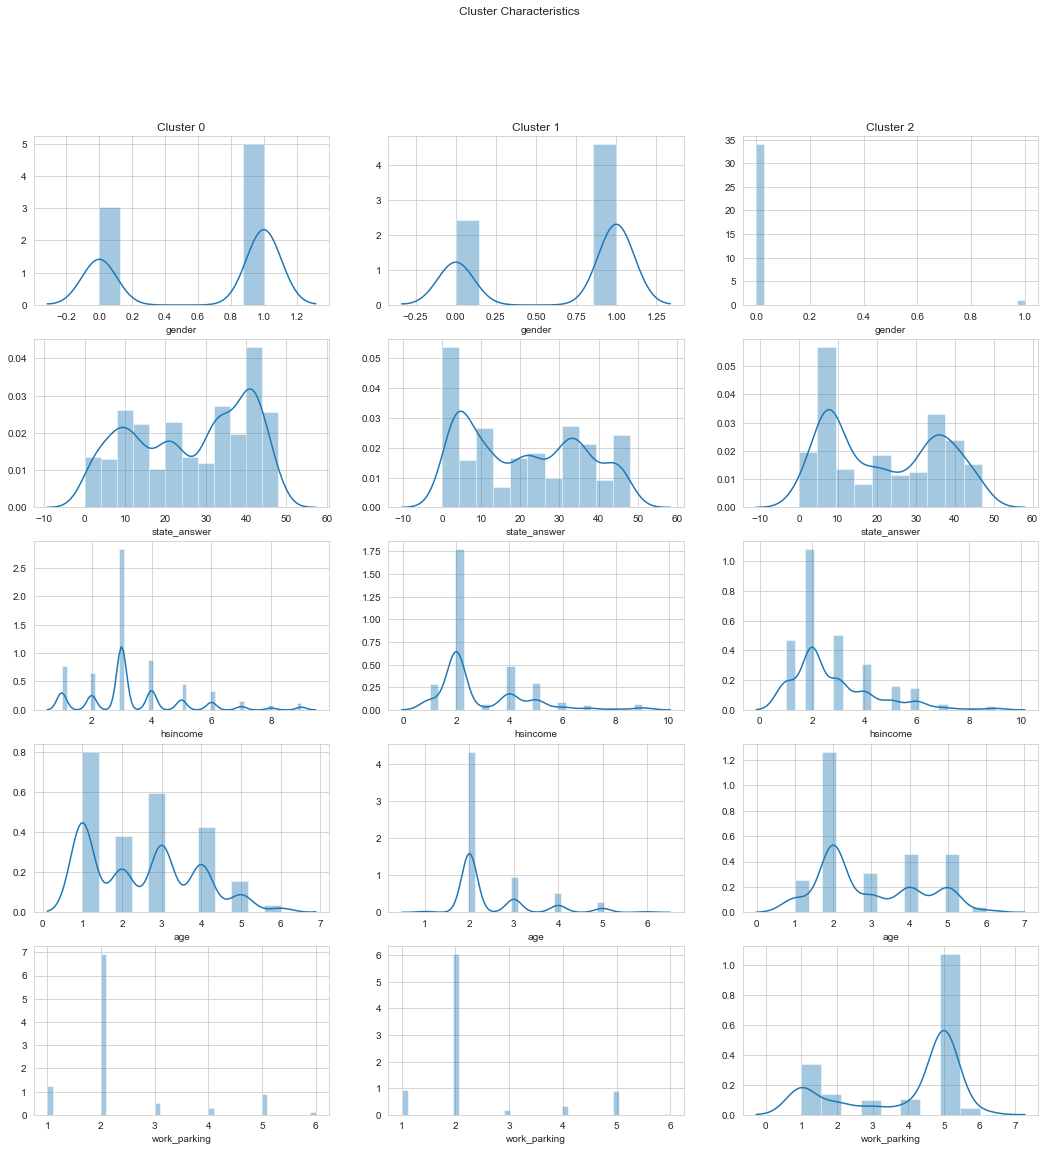

In [47]:
# Visualizing, Characteristics
fig, axes = plt.subplots(5,3, figsize=(18,18))

fig.suptitle('Cluster Characteristics')

axes[0,0].set_title('Cluster 0')
axes[0,1].set_title('Cluster 1')
axes[0,2].set_title('Cluster 2')

sns.distplot(pi_[pi_.Cluster==0]['gender'],ax=axes[0,0])
sns.distplot(pi_[pi_.Cluster==1]['gender'],ax=axes[0,1])
sns.distplot(pi_[pi_.Cluster==2]['gender'],ax=axes[0,2])

sns.distplot(pi_[pi_.Cluster==0]['state_answer'],ax=axes[1,0])
sns.distplot(pi_[pi_.Cluster==1]['state_answer'],ax=axes[1,1])
sns.distplot(pi_[pi_.Cluster==2]['state_answer'],ax=axes[1,2])

sns.distplot(pi_[pi_.Cluster==0]['hsincome'],ax=axes[2,0])
sns.distplot(pi_[pi_.Cluster==1]['hsincome'],ax=axes[2,1])
sns.distplot(pi_[pi_.Cluster==2]['hsincome'],ax=axes[2,2])

sns.distplot(pi_[pi_.Cluster==0]['age'],ax=axes[3,0])
sns.distplot(pi_[pi_.Cluster==1]['age'],ax=axes[3,1])
sns.distplot(pi_[pi_.Cluster==2]['age'],ax=axes[3,2])

sns.distplot(pi_[pi_.Cluster==0]['work_parking'],ax=axes[4,0])
sns.distplot(pi_[pi_.Cluster==1]['work_parking'],ax=axes[4,1])
sns.distplot(pi_[pi_.Cluster==2]['work_parking'],ax=axes[4,2])

### Vehicle Usage Behaviour 
* dmileage: car driving range daily, if it were to be replaced
* long_dist: #of long distance trips(>50mi) in a month, if it were to be replaced 
* gascost: spending per month, if it were to be replaced

In [48]:
vuse = df[['dmileage','long_dist','gascost']]

Feature 0: 7.523789
Feature 1: 0.302409
Feature 2: 0.211076


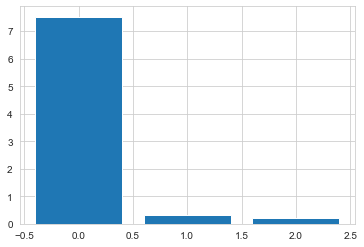

In [49]:
# Select all Features (Seems like they are all important)
selectK(vuse)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 10752.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 10752.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 10752.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 10752.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 10752.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 444, cost: 9144.0
Run 1, iteration: 2/100, moves: 888, cost: 9000.0
Run 1, iteration: 3/100, moves: 36, cost: 9000.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100,

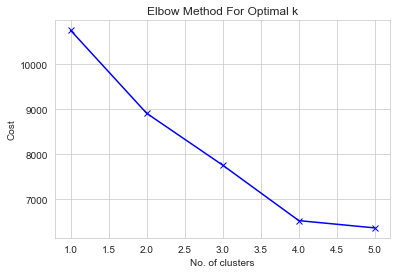

In [1752]:
k_mode(vuse)

In [50]:
#Running the Simulation (100 times) using the function created
vuse_sim = simulation(vuse)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1116, cost: 7692.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 306, cost: 7476.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 906, cost: 7734.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 534, cost: 7746.0
Run 4, iteration: 2/100, moves: 1962, cost: 7746.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 468, cost: 8544.0
Best run was number 2
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1248, cost: 8478.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 642, cost: 8826.0
Init: initializ

Starting iterations...
Run 5, iteration: 1/100, moves: 1236, cost: 7536.0
Best run was number 5
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1416, cost: 7470.0
Run 1, iteration: 2/100, moves: 66, cost: 7470.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 606, cost: 8544.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 612, cost: 8142.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 8220.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 840, cost: 8250.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1464, cost: 7404.0
Init: initializing centroids
Init: initializing clust

Starting iterations...
Run 1, iteration: 1/100, moves: 1500, cost: 8016.0
Run 1, iteration: 2/100, moves: 78, cost: 8016.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1014, cost: 7710.0
Run 2, iteration: 2/100, moves: 102, cost: 7710.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 720, cost: 8340.0
Run 3, iteration: 2/100, moves: 0, cost: 8340.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1038, cost: 8322.0
Run 4, iteration: 2/100, moves: 0, cost: 8322.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1968, cost: 7560.0
Run 5, iteration: 2/100, moves: 6, cost: 7560.0
Best run was number 5
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1362, cost: 8016.0
Init: i

Run 1, iteration: 2/100, moves: 246, cost: 7584.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2154, cost: 7614.0
Run 2, iteration: 2/100, moves: 402, cost: 7494.0
Run 2, iteration: 3/100, moves: 36, cost: 7494.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 480, cost: 8166.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 7548.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1014, cost: 7416.0
Best run was number 5
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 948, cost: 8304.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 954, cost: 8298.0
Init: initializing centroids
Init: initializing c

Run 5, iteration: 1/100, moves: 696, cost: 8478.0
Best run was number 2
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 294, cost: 7782.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 7938.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1188, cost: 7392.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 312, cost: 7914.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 702, cost: 7602.0
Best run was number 3
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 780, cost: 8484.0
Run 1, iteration: 2/100, moves: 450, cost: 8412.0
Run 1, iteration: 3/100, moves: 72, cost: 8412.0
Init: initializing centroids

Run 3, iteration: 2/100, moves: 60, cost: 7392.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 126, cost: 8172.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1554, cost: 7620.0
Run 5, iteration: 2/100, moves: 264, cost: 7620.0
Best run was number 3
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 396, cost: 8766.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 564, cost: 8388.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 8934.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 378, cost: 8166.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/

Starting iterations...
Run 4, iteration: 1/100, moves: 516, cost: 7476.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1740, cost: 7314.0
Run 5, iteration: 2/100, moves: 66, cost: 7314.0
Best run was number 5
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 288, cost: 8322.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 960, cost: 7554.0
Run 2, iteration: 2/100, moves: 36, cost: 7554.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1140, cost: 8556.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1176, cost: 7428.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1290, cost: 7572.0
Run 5, iteration: 2/100

Run 4, iteration: 2/100, moves: 78, cost: 8622.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 150, cost: 7608.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 7968.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 708, cost: 8478.0
Run 2, iteration: 2/100, moves: 732, cost: 8334.0
Run 2, iteration: 3/100, moves: 24, cost: 8334.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1386, cost: 7470.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 276, cost: 8694.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 54, cost: 7680.0
Best run was number 3
Init: initializing centroids
I

Run 4, iteration: 1/100, moves: 720, cost: 7542.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 516, cost: 7980.0
Best run was number 3
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 102, cost: 7770.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1188, cost: 7596.0
Run 2, iteration: 2/100, moves: 66, cost: 7596.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1080, cost: 7872.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 918, cost: 7584.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 744, cost: 7440.0
Best run was number 5
Init: initializing centroids
Init: initializing clusters
Starting iteration

Run 5, iteration: 1/100, moves: 978, cost: 7686.0
Run 5, iteration: 2/100, moves: 144, cost: 7686.0
Best run was number 4
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 8832.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 942, cost: 8280.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 990, cost: 8370.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 8166.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 114, cost: 7584.0
Best run was number 5


In [51]:
# Reseting Index for features extracted from original df 
vuse.reset_index(inplace=True)
vuse.drop(['index'],axis=1,inplace=True)
vuse.reset_index(inplace=True)

In [52]:
# Renaming the Cluster Combination Df column
vuse_sim[1].rename(columns={0:'Cluster_v'},inplace=True)

In [53]:
# Initial Merge with info + Cluster
v_ = pd.merge(vuse,vuse_sim[1])

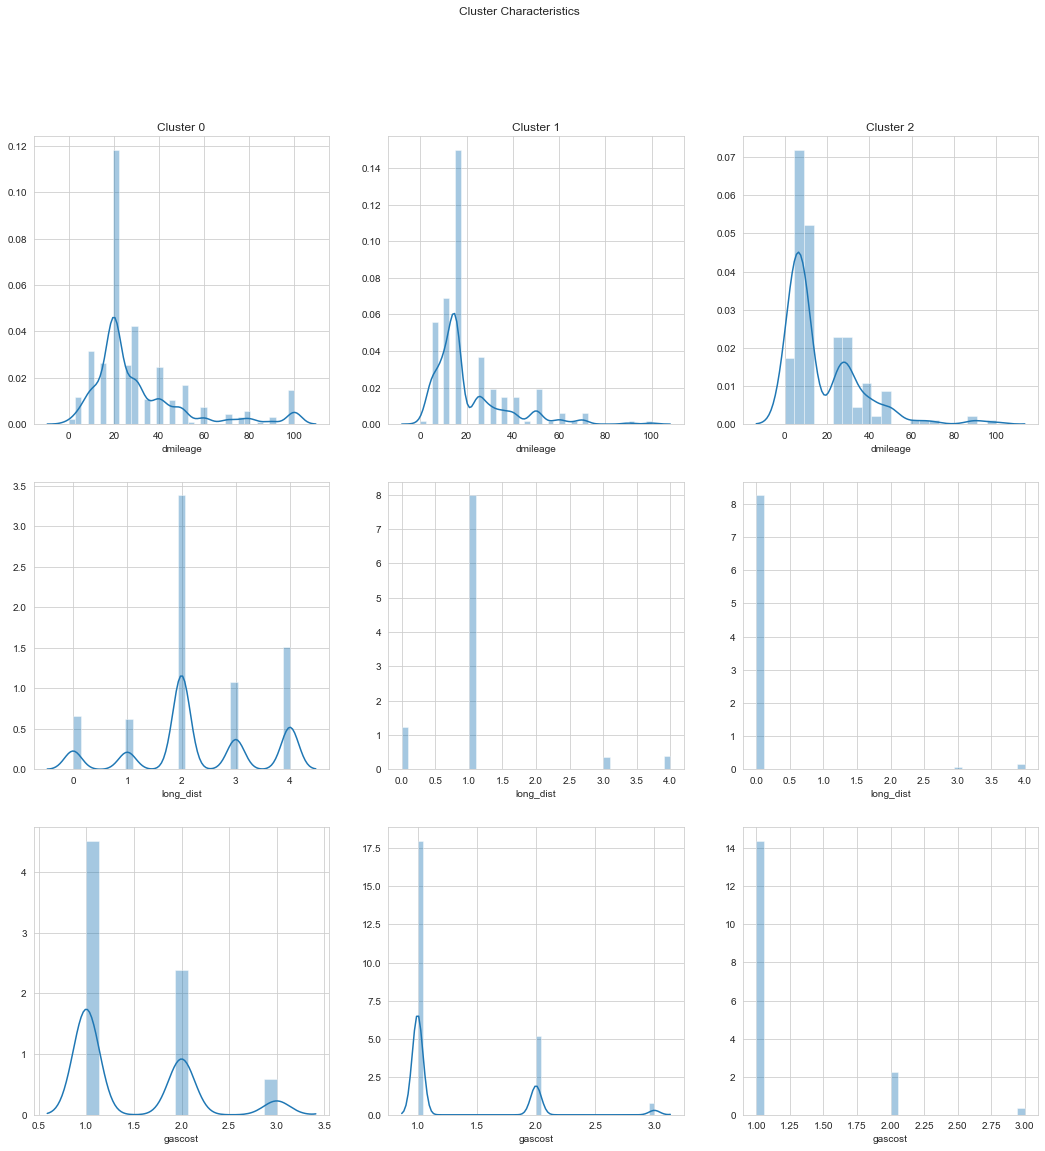

In [54]:
fig, axes = plt.subplots(3,3, figsize=(18,18))

fig.suptitle('Cluster Characteristics')

axes[0,0].set_title('Cluster 0')
axes[0,1].set_title('Cluster 1')
axes[0,2].set_title('Cluster 2')

sns.distplot(v_[v_.Cluster_v==0]['dmileage'],ax=axes[0,0])
sns.distplot(v_[v_.Cluster_v==1]['dmileage'],ax=axes[0,1])
sns.distplot(v_[v_.Cluster_v==2]['dmileage'],ax=axes[0,2])

sns.distplot(v_[v_.Cluster_v==0]['long_dist'],ax=axes[1,0])
sns.distplot(v_[v_.Cluster_v==1]['long_dist'],ax=axes[1,1])
sns.distplot(v_[v_.Cluster_v==2]['long_dist'],ax=axes[1,2])

sns.distplot(v_[v_.Cluster_v==0]['gascost'],ax=axes[2,0])
sns.distplot(v_[v_.Cluster_v==1]['gascost'],ax=axes[2,1])
sns.distplot(v_[v_.Cluster_v==2]['gascost'],ax=axes[2,2])

In [55]:
# Merge with Previous Section(Personal Info) + Current Section(Vehicle Usage)
pi_v = pd.merge(pi_,v_)

In [56]:
pi_v.head()

,index,gender,state_answer,hsincome,age,work_parking,Cluster,dmileage,long_dist,gascost,Cluster_v
0,0,0,44,2,3,4,2,25,1,1,1
1,1,0,44,2,3,4,2,25,1,1,1
2,2,0,44,2,3,4,2,25,1,1,1
3,3,0,44,2,3,4,2,25,1,1,1
4,4,0,44,2,3,4,2,25,1,1,1


### Charging Station Infra
* home_chg :home -> Charging (min)
* work_chg: work -> Charging (min)
* fasttime: Fast charging time from empty to full
* town
* highway: avg distance between two fast charging stations on highway
* home_evse: EV charing at home available?
* work_evse: EV charging at work available? 

In [57]:
charge = df[['home_chg','work_chg','fasttime','town','highway','home_evse','work_evse']]

Feature 0: 135.138090
Feature 1: 89.576961
Feature 2: 26.412141
Feature 3: 18.321502
Feature 4: 0.727669
Feature 5: 0.192960
Feature 6: 1.519971


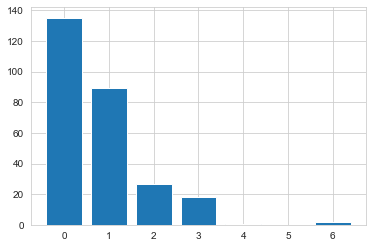

In [59]:
selectK(charge)

In [60]:
#Selected Features
charge = df[['home_chg','work_chg','fasttime','town']]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 18506.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 18506.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 18506.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 18506.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 18506.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 736, cost: 15771.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 303, cost: 15939.0
Init: initializing centroids
Init: initializing clusters
Starting itera

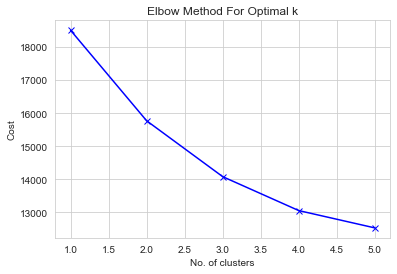

In [1760]:
k_mode(charge)

In [61]:
charge_sim = simulation(charge)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 14441.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 14613.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 586, cost: 14041.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 675, cost: 14239.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1093, cost: 14474.0
Best run was number 3
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1354, cost: 14247.0
Run 1, iteration: 2/100, moves: 839, cost: 14247.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 14747.0
Init: initiali

Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 14739.0
Best run was number 4
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1246, cost: 14141.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 14600.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1676, cost: 14208.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 832, cost: 14573.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 732, cost: 14419.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 14448.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/

Starting iterations...
Run 3, iteration: 1/100, moves: 1119, cost: 14407.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1490, cost: 13953.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 538, cost: 14204.0
Run 5, iteration: 2/100, moves: 681, cost: 14204.0
Best run was number 4
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1042, cost: 14089.0
Run 1, iteration: 2/100, moves: 312, cost: 14089.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1317, cost: 14238.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 14618.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1851, cost: 14473.0
Run 4, iterat

Run 4, iteration: 1/100, moves: 0, cost: 14668.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 280, cost: 14301.0
Best run was number 5
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1641, cost: 14204.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 570, cost: 14375.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 420, cost: 14246.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 14349.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1650, cost: 14616.0
Run 5, iteration: 2/100, moves: 289, cost: 14616.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iter

Starting iterations...
Run 2, iteration: 1/100, moves: 645, cost: 14877.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 664, cost: 14247.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 663, cost: 14874.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1053, cost: 14397.0
Run 5, iteration: 2/100, moves: 143, cost: 14397.0
Best run was number 3
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 14460.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 704, cost: 14214.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 14555.0
Init: initializing centroids
Init: initializing clusters
Starting iter

Run 2, iteration: 1/100, moves: 429, cost: 14723.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 360, cost: 14436.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 495, cost: 14608.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 14838.0
Best run was number 3
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 366, cost: 14795.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 1159, cost: 14469.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1332, cost: 14116.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 466, cost: 14917.0
Init: init

Starting iterations...
Run 1, iteration: 1/100, moves: 784, cost: 14455.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 556, cost: 14135.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1645, cost: 14091.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 14515.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 506, cost: 14843.0
Best run was number 3
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 552, cost: 14342.0
Run 1, iteration: 2/100, moves: 359, cost: 14342.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 272, cost: 14560.0
Init: initializing centroids
Init: initializing clusters
Starting it

Run 5, iteration: 1/100, moves: 1451, cost: 14255.0
Best run was number 3
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 818, cost: 14540.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 937, cost: 14565.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 696, cost: 14394.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1541, cost: 14136.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 14521.0
Best run was number 4
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1323, cost: 14153.0
Run 1, iteration: 2/100, moves: 6, cost: 14153.0
Init: initializing centroids
Init: initializing clusters
Starting ite

In [62]:
charge.reset_index(inplace=True)
charge.drop(['index'],axis=1,inplace=True)
charge.reset_index(inplace=True)

In [63]:
charge_sim[1].rename(columns={0:'Cluster_c'},inplace=True)

In [64]:
c_ = pd.merge(charge, charge_sim[1])

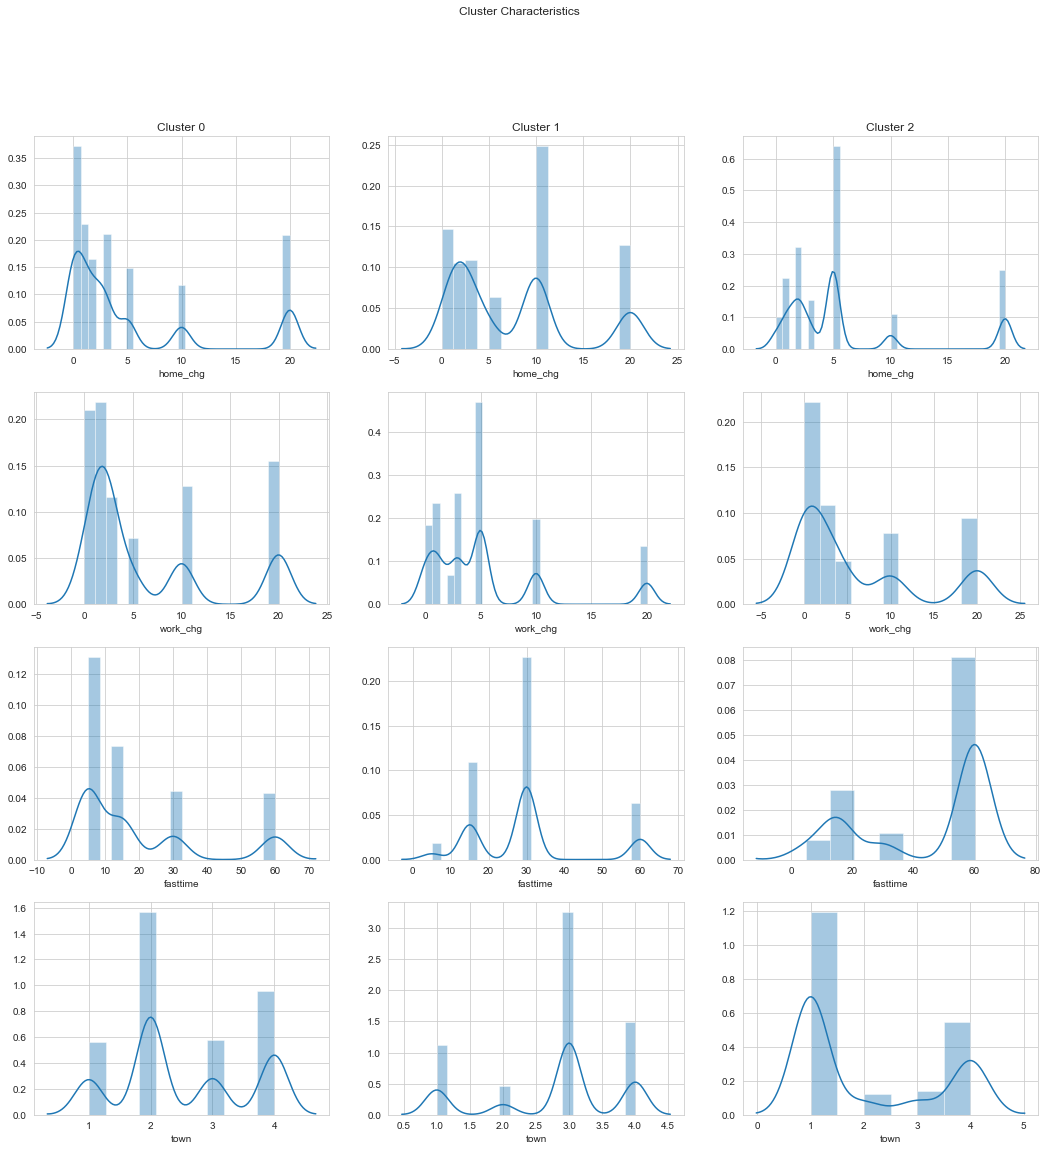

In [65]:
fig, axes = plt.subplots(4,3, figsize=(18,18))

fig.suptitle('Cluster Characteristics')

axes[0,0].set_title('Cluster 0')
axes[0,1].set_title('Cluster 1')
axes[0,2].set_title('Cluster 2')

sns.distplot(c_[c_.Cluster_c==0]['home_chg'],ax=axes[0,0])
sns.distplot(c_[c_.Cluster_c==1]['home_chg'],ax=axes[0,1])
sns.distplot(c_[c_.Cluster_c==2]['home_chg'],ax=axes[0,2])

sns.distplot(c_[c_.Cluster_c==0]['work_chg'],ax=axes[1,0])
sns.distplot(c_[c_.Cluster_c==1]['work_chg'],ax=axes[1,1])
sns.distplot(c_[c_.Cluster_c==2]['work_chg'],ax=axes[1,2])

sns.distplot(c_[c_.Cluster_c==0]['fasttime'],ax=axes[2,0])
sns.distplot(c_[c_.Cluster_c==1]['fasttime'],ax=axes[2,1])
sns.distplot(c_[c_.Cluster_c==2]['fasttime'],ax=axes[2,2])

sns.distplot(c_[c_.Cluster_c==0]['town'],ax=axes[3,0])
sns.distplot(c_[c_.Cluster_c==1]['town'],ax=axes[3,1])
sns.distplot(c_[c_.Cluster_c==2]['town'],ax=axes[3,2])

In [66]:
pi_v_c = pd.merge(pi_v,c_)

In [1892]:
pi_v_c.head()

,index,gender,state_answer,hsincome,age,work_parking,Cluster,dmileage,long_dist,gascost,Cluster_v,home_chg,work_chg,fasttime,town,Cluster_c
0,0,0,44,2,3,4,2,25,1,1,1,0,0,15,2,0
1,1,0,44,2,3,4,2,25,1,1,1,20,3,15,3,1
2,2,0,44,2,3,4,2,25,1,1,1,0,10,30,3,1
3,3,0,44,2,3,4,2,25,1,1,1,0,10,5,3,0
4,4,0,44,2,3,4,2,25,1,1,1,20,20,30,3,1


We want to track where each invidiuals from Each Clusters are ended up in the final Section 

In [1928]:
# The input here is the Cluster Number for Personal Information Section
def cluster_dist(cluster_pi):
    cluster = []
    veh_cluster = [0,1,2]
    
    # Looping though the Cluster of Vehicle Usage 
    for i in veh_cluster:
        cluster.append(pi_v_c[(pi_v_c.Cluster == cluster_pi) & (pi_v_c.Cluster_v == i)]
                         ['Cluster_c'].value_counts().to_frame().reset_index())
        
        #From Cluster 0 -> Cluster 0 -> Cluster_C Value counts to determine how many samples traveled
    
    #Mering the dataframe of Cluster Combination
    data_frames = cluster[:]
    result = reduce(lambda df_left,df_right: pd.merge(df_left, df_right, 
                                              left_index=True, right_index=True, on=['index'],
                                              how='outer'),data_frames)
    
    result.columns = ['Cluster_C','Cluster_v{}'.format(veh_cluster[0]),'Cluster_v{}'.format(veh_cluster[1]),
                    'Cluster_v{}'.format(veh_cluster[2])]
    
    result = result.sort_values(by='Cluster_C')
    result['Cluster_PI'] = cluster_pi
    
    return result

The Logic here is that we want to track individuals from each clusters and visualize where they are likely to go from each section, We have 3 * 3 * 3 Possible Combinations of Clusters (000, 001, 002, 010, 011,012,020,021,022) and so on, totaling 27 possible combinations. The function above combines all the combinations (9 total) when we start from Cluster 0 of Personal Information Section. And we can input either 0, 1, 2 to the function to get overall of 27 combinations

In [2009]:
cl0 = cluster_dist(0) #0th cluster of PI section
cl1 = cluster_dist(1) #1st cluster of PI section
cl2 = cluster_dist(2) #2nd cluster of PI section 

In [2011]:
clusters = pd.concat([cl0,cl1,cl2])
# Visualization of Cluster Distribution
clusters = pd.pivot_table(clusters,index=['Cluster_PI','Cluster_C'])
clusters

Cluster_v0  Cluster_v1  Cluster_v2
Cluster_PI Cluster_C                                    
0          0                 751         338         259
           1                 447         214         170
           2                 302         150         117
1          0                 461         257         180
           1                 258         162         111
           2                 217         103          69
2          0                 256         218         139
           1                 161         121          95
           2                 105          69          72

In [71]:
# # The Perentage representation is better than the counting, but we could use the counting in the future
# def percent(dataframe):
#     p = []
    
#     #sample size for each Cluster for Charging Section 
#     ssize = pi_v_c['Cluster_C'].value_counts().to_frame().reset_index().sort_values(by='index')
    
#     for i in dataframe['Cluster_C'].values:
#         pp = []
#         for j in dataframe.iloc[i,1:]:
#             d= j/ssize[ssize.index==i]['Cluster_c'].values*100
#             pp.append(d[0])
#         p.append(pp)
    
#     data = pd.DataFrame(p,columns=[0,1,2])
    
#     return data

#### Percentage computation can be done in Two Ways:
1. Computation based on the Clusterting Population
** Taking Each Cluster as a seperate population and Calculate the Traveling Portion
2. Compuation based on the Entire Population (Whole Dataset)
** Taking each Cluster combination as a part of Entire Population

In [1463]:
# Number of Samples within Each Cluster from Personal Information 
pi_v_c['Cluster'].value_counts().to_frame().reset_index().sort_values(by='index')

,index,Cluster
0,0,2748
1,1,1818
2,2,1236


In [1953]:
cl0.iloc[:,1:-1] = cl0.iloc[:,1:-1]/2748*100
cl1.iloc[:,1:-1] =cl1.iloc[:,1:-1]/1818*100
cl2.iloc[:,1:-1]= cl2.iloc[:,1:-1]/1236*100

In [1954]:
cl_p = pd.concat([cl0,cl1,cl2])
cl_p = pd.pivot_table(cl_p, index=['Cluster_PI','Cluster_C'])
cl_p

Cluster_v0  Cluster_v1  Cluster_v2
Cluster_PI Cluster_C                                    
0          0           27.328967   12.299854    9.425036
           1           16.266376    7.787482    6.186317
           2           10.989811    5.458515    4.257642
1          0           25.357536   14.136414    9.900990
           1           14.191419    8.910891    6.105611
           2           11.936194    5.665567    3.795380
2          0           20.711974   17.637540   11.245955
           1           13.025890    9.789644    7.686084
           2            8.495146    5.582524    5.825243

In [1982]:
vals = []
for i in range(0,9):
    for j in cl_p.iloc[i].values:
        vals.append(j)

<BarContainer object of 9 artists>

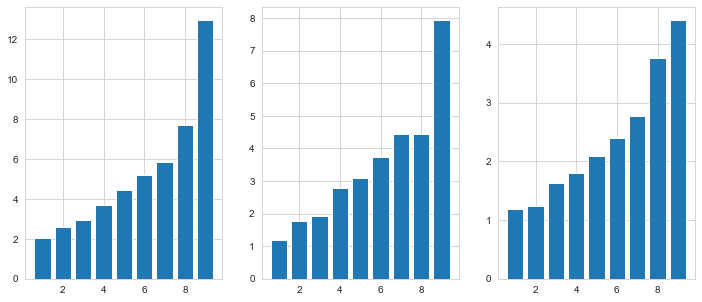

In [2070]:
fig = plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
plt.bar(x=np.arange(1,10,1), height=sorted(vals[0:9]))

plt.subplot(1,3,2)
plt.bar(x=np.arange(1,10,1),height=sorted(vals[9:18]))

plt.subplot(1,3,3)
plt.bar(x=np.arange(1,10,1),height=sorted(vals[18:]))

### Proportions Calculated in terms of Overall Population Sample

In [2013]:
overall_p = clusters/5802*100
overall_p

Cluster_v0  Cluster_v1  Cluster_v2
Cluster_PI Cluster_C                                    
0          0           12.943812    5.825577    4.463978
           1            7.704240    3.688383    2.930024
           2            5.205102    2.585315    2.016546
1          0            7.945536    4.429507    3.102378
           1            4.446743    2.792141    1.913133
           2            3.740090    1.775250    1.189245
2          0            4.412272    3.757325    2.395726
           1            2.774905    2.085488    1.637366
           2            1.809721    1.189245    1.240951

<BarContainer object of 27 artists>

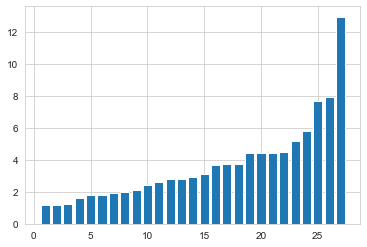

In [2015]:
vals = []
for i in range(0,9):
    for j in overall_p.iloc[i].values:
        vals.append(j)
plt.bar(x=np.arange(1,28,1), height=vals)

In [28]:
#Groups that are Identified to be Important (Portions are big)
impt_cl = pd.DataFrame(np.array([0,1,2,3,6,9,10,18]).reshape(1,-1), columns=['000','001','002','010','020','100','101','200'])
impt_cl

,000,001,002,010,020,100,101,200
0,0,1,2,3,6,9,10,18


## Final Dataframe Construction - Combining All the clusters + Remaining Features

<b>Remaining Features that are considered the most Important<b>
<br>
range: Desired Range of EV 
<br>
priceshow: Desired Price of EV
<br>
numpirce: Maximum Budge of EV
<br>

In [75]:
# The remaining Features that are considered important 
imp = df[['range','numprice','priceshow','bichoice']]

In [76]:
imp.reset_index(inplace=True)
imp.drop(['index'],axis=1,inplace=True)
imp.reset_index(inplace=True)

In [77]:
final = pd.merge(pi_v_c,imp)

In [2]:
final = pd.read_csv('customer.csv')

In [3]:
final = final.drop(['Unnamed: 0'],axis=1)
#The Dataframe combines all of the designated clusters from each Sections (PI, Charging, Vehicle driving behavior)

In [4]:
final

,index,gender,state_answer,hsincome,age,work_parking,Cluster,dmileage,long_dist,gascost,Cluster_v,home_chg,work_chg,fasttime,town,Cluster_c,range,numprice,priceshow,bichoice
0,0,0,44,2,3,4,2,25,1,1,1,0,0,15,2,0,100,10000,7000,1
1,1,0,44,2,3,4,2,25,1,1,1,20,3,15,3,1,400,10000,7000,0
2,2,0,44,2,3,4,2,25,1,1,1,0,10,30,3,1,200,10000,7000,1
3,3,0,44,2,3,4,2,25,1,1,1,0,10,5,3,0,300,10000,8500,1
4,4,0,44,2,3,4,2,25,1,1,1,20,20,30,3,1,100,10000,7000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5797,5797,1,9,5,2,2,1,10,0,1,2,1,3,30,1,1,300,40000,40000,0
5798,5798,1,9,5,2,2,1,10,0,1,2,0,1,15,3,0,400,40000,40000,0
5799,5799,1,9,5,2,2,1,10,0,1,2,20,5,15,1,1,200,40000,28000,0
5800,5800,1,9,5,2,2,1,10,0,1,2,10,10,5,4,0,300,40000,40000,0


# Cluster - Naive Bayes Hybrid (Customized NB)

General Overview of Process So far:
1. The original Dataset had Features that were not reallt important to the choice that lead to Electric Vehicle Purchase
- Removed those features that were redundant or irrelevant

2. Due to the Large Features, it can be effected by the curse of dimensionality, therefore clustering was a method to choose certain individual groups that are in similar conditions and identify their reponse.
- The Features were also divided into subgroups depending on the question type
A. There were questions that soely asked about personal information: Gender, Age, Income, etc..
B. There were questions that asked about charging infrastructure (Individual's access to Charging service - either home or work)
C. There were questions that asked about person's behaviour in driving a vehicle (Distnace they travel, gas spending etc.)
D. Essential Features: When they were given that the available Electric Vehicle has certain Spec (Range and Price) 

- From Each of these question sections, I have decided make feature selection based on chi-squre 

3. With the Selected Feature (Contribute most for purchasing EV), K-mode clustering algorithm was used
- K-Mode is specific for Categorical Variables (Since our dataset is lacking any Continuous variables)
- K-Mode clustered each question sections based on their similarity
* This process is Repeated for Each question section (personal Info, Driving Behavior, Charing Infrastructure)

Cluster Combination is Determined
Ex. Cluster 1 from Personal Information is likely to endup in Cluster 2 or Driving Behavior and these individuals also travels to the 3rd Cluster in Charging Infrastructure and ultimately when these individuals are given a certain EV specs, it is possible to determine the probability of them buying or Not buying an Electriv Vehicle.

* So far Each question section has 3 clusters each = 3 X 3 X 3 = 27 Total Possible Cluster Combinations 

#### Objective,:
We can Determine the Gaussian Distribution of Clusters Combination

In [11]:
cluster_group = []

for i in range (0,3):
    for j in range(0,3):
        for k in range(0,3):
            if i == 0:
                cluster_group.append(final[(final.Cluster == i) & (final.Cluster_v == j) & (final.Cluster_c == k)])
                # This loop -> 000, 001, 002, 010, 011, 012, 020, 021, 022

            elif i == 1:
                cluster_group.append(final[(final.Cluster == i) & (final.Cluster_v == j) & (final.Cluster_c == k)])
                # THis loop -> 100, 101, 102, 110, 111, 112, 120, 121, 122

            elif i == 2:
                cluster_group.append(final[(final.Cluster == i) & (final.Cluster_v == j) & (final.Cluster_c == k)])
                # This loop -> 200, 201, 202, 210, 211, 212, 220, 221, 222


cluster_group contains the Features + Output for each cluster combination (27 of them in total) as a dataframe

In [12]:
#Feature selection from each cluster combination
def feat_select(dataframe):
    X = dataframe.drop(['index','Cluster','Cluster_v','Cluster_c','bichoice'],axis=1)
    y = dataframe['bichoice']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)
    
    X_train_fs, X_test_fs, fs = select_features(X_train,y_train, X_test)
    
    #creating a dictionary for feature selection score on each feature
    feat = {}
    for i in range(len(fs.scores_)): # Feature score is based on chi-square
        feat[i] = fs.scores_[i]
    
    #sorting the dictionary based on the value (not Key)
    # Here the Key is the Score from feature selection and Value is the location of that feature (1st ,2nd 3rd...)
    sorted_key = sorted(feat.items(),reverse=True, key=lambda kv: kv[1])    
    
    #Selecting the top 5 Features (highest score selected)
    top5 = sorted_key[:5]
    
    #From top 5, get the keys (nth feature)
    li = [] # this list contains the location of top 5 features
    for i in top5:
        li.append(i[0])
    
    feat_s = X[X.columns[li]].reset_index() #Selecting the nth feature from the X dataframe 
    bi = y.reset_index()
    
    clustering_comb = pd.merge(feat_s,bi) #Merge with the Outcome an return the dataframe having Top5 features + Outcome
    
    
    return clustering_comb

Logic here is that we know we have done feature selection previously with individual question section, here since we have find the combinations, we are now going to see what features are most relevant to the outcome for each clustering groups (27 total).
<br>
The expectation is that there might be some difference in selected features (not completely different since some features such as range or price will definitely contribute most for purchase decision).

In [13]:
#looping all the cluster (27) select feature and retun the dataframe with only top 5 features (total output number is 27)
cluster_comb = [] #This list will contain the Dataframe obtained from feat_select function for all 27 combinations
for i in cluster_group:
    cluster_comb.append(feat_select(i))

In [14]:
# Getting the probabilities Matrix used for Naive Bayes formula 
def probability (dataframe): #Dataframe inserted here will be the cluster_comb[:]
    
    li = []
    # Loop through columns obtained from cluster_comb list (above)
    for j in dataframe.columns[1:-1]: # Top 5 Feature names selected
        for i in dataframe[j].value_counts().keys(): #get the classes within each feature(Ex, Range: 100 200 300 400)
            
            #Ex. P(Xn|Y) = P(Range = 30,000 | Bichoice = 1) = Total # of Range = 30,000 where bichoice = 1/ Total # bichoice = 1
            #Ex. For Cluster_comb[0], that is Cluster 0-0-0, The Total Sample Size is 751 -> 400 for y=1 and 351 for y=0
            # These values witll be the Denominator, Numerator will be depending on the Specific Class with a certain Feature
            p = dataframe[dataframe[j] == i]['bichoice'].value_counts()/dataframe['bichoice'].value_counts()
            p = p.to_frame().reset_index()
            p.rename(columns={'bichoice': '{} {}'.format(j,i) },inplace=True)
        
            li.append(p)

        
    data_frames = li[:]
    result = reduce(lambda df_left,df_right: pd.merge(df_left, df_right, 
                                              left_index=True, on=['index'],#right_index=True,
                                              how='outer'),data_frames)
    result.drop(['index'],axis=1,inplace=True)
    result.fillna(0,inplace=True)
    
    return result
        

Naive Bayes have a formulat that is:
<br>
<b>P(y|X1, X2, X3 ... Xn) = P(X1|y) + P(X2|y) + P(X3|y) ... P(Xn|y) x P(y) / P(Xn|y)P(y) + P(Xn| Not y)P(Not y)<b>
<br>
The Logic in the function Naive_bayes() is that it accepts the input
    1. Cluster combination dataframe (with Top 5 Features Selected)
    2. Probability Matrix of that Specific Cluster combination 
    3. Which y we want to predict - bichoice of 0 or 1
    - this will not matter that much because when we calculate probability for certain y, the opposite y will have contradicting probability. (Ex. When bichoice 1 has probability of 70%, when predicting bichoice 0, it will have p of 30%)

In [15]:
# Dataframe: one out of 27 Cluster combination
# Prior: The percentange calculated from the Dataframe (1/27 Cluster comb)
# y: Defining whether we would like to see the probabilities of bichoce 0 or 1
def Naive_bayes(dataframe,prior,y):
    
    y_0 = [] #bichoice = 0: P(Xn|Y=0).... *P(Y=0)
    for i in range(len(dataframe)):
        per_0 = 1
        for key,val in dict(dataframe.iloc[i,1:-1]).items():
            match = '{} {}'.format(key,val)
            if match in prior.columns:
                val = prior[match][0]
                per_0 = per_0 * val

        y_0.append(per_0 * (len(dataframe[dataframe.bichoice==0])/len(dataframe)))

    
    y_1 = [] # bichoice = 1: P(Xn|Y=1).... * P(Y=1)
    for i in range(len(dataframe)):
        per_1 = 1
        for key,val in dict(dataframe.iloc[i,1:-1]).items():
            match = '{} {}'.format(key,val)
            if match in prior.columns:
                val = prior[match][1]
                per_1 = per_1 * val

        y_1.append(per_1 * (len(dataframe[dataframe.bichoice==1])/len(dataframe)))
    
    
    # P(Xn|y)p(y) + P(Xn|not y)P(not y) = Denominator
    denom = [(i+j) for i,j in zip(y_0,y_1)] 
    
    if y == 0: #P(Y=0|Xn)
        total = [int((i/j)*100) for i,j in zip(y_0, denom)] #Numerator/ Denominator
    elif y == 1: #P(Y=1|Xn)
        total = [int((i/j)*100) for i,j in zip(y_1, denom)]
    
    total = [0 if i ==100 else i for i in total]
    
    return total
    
    

## Testing the Process and Functions

In [16]:
# This is the initial input to our function feat_select()
cluster_group[0].head() #cluster_group[0] is 0th -> 0th -> 0th cluster (1/27 combination)

,index,gender,state_answer,hsincome,age,work_parking,Cluster,dmileage,long_dist,gascost,Cluster_v,home_chg,work_chg,fasttime,town,Cluster_c,range,numprice,priceshow,bichoice
6,6,1,11,3,3,2,0,25,2,1,0,3,2,15,1,0,300,15000,12750,0
9,9,1,11,3,3,2,0,25,2,1,0,3,1,5,4,0,400,15000,12750,1
79,79,1,41,3,2,2,0,10,2,3,0,1,20,5,3,0,200,20000,17000,0
80,80,1,41,3,2,2,0,10,2,3,0,2,2,30,4,0,200,20000,17000,1
81,81,1,41,3,2,2,0,10,2,3,0,5,2,5,3,0,100,20000,14000,1


In [17]:
#executing a function results in the dataframe shown (having Top 5 Features selected - used chi-squared feature selection)
cluster_comb[0].head() 

,index,numprice,range,priceshow,home_chg,fasttime,bichoice
0,6,15000,300,12750,3,15,0
1,9,15000,400,12750,3,5,1
2,79,20000,200,17000,1,5,0
3,80,20000,200,17000,2,30,1
4,81,20000,100,14000,5,5,1


In [18]:
# Running a probability() function provides a probability matrix
# Columns indicates all the groups within a feature (Ex. Range: 100, 200, 300 ..etc)
# Each group of a feature will have different probability for either bichoice (desired output for prediction) 0 or 1 (indicated by index)
probability(cluster_comb[0])

,numprice 30000,numprice 20000,numprice 25000,numprice 10000,numprice 40000,numprice 15000,numprice 50000,numprice 5000,range 100,range 300,...,home_chg 3,home_chg 1,home_chg 20,home_chg 5,home_chg 2,home_chg 10,fasttime 5,fasttime 15,fasttime 30,fasttime 60
0,0.239316,0.202279,0.125356,0.119658,0.096866,0.096866,0.062678,0.05698,0.339031,0.222222,...,0.156695,0.139601,0.159544,0.128205,0.091168,0.091168,0.447293,0.242165,0.139601,0.17094
1,0.180000,0.155000,0.167500,0.160000,0.147500,0.090000,0.072500,0.02750,0.192500,0.280000,...,0.162500,0.167500,0.135000,0.107500,0.122500,0.052500,0.445000,0.265000,0.160000,0.13000


In [19]:
#Input of Df of cluster combination, probability matrix (Returning the Likelihood only), indication of outcome (0 or 1)
Naive_bayes(cluster_comb[0],probability(cluster_comb[0]),0)[:10]
#Showing the first 10 Calculated probabilities

[40, 37, 59, 53, 71, 39, 23, 46, 24, 38]

Interpretation: Naive Bayes function returns the Proability P(Y=0|X1,X2...Xn) the posterior probability
*This is done for entire samples 

# Computing Naive  Bayes Algorithm for All Cluster Combinations

In [20]:
#Running all of 27 cluster combination with generated functions to get the final result as probability 
bayes_proba = []# The list contains all the probabilities calculated for each samples in each 27 clusters combination 
for i in cluster_comb: #27 Combination in a list format
    pr = probability(i)
    bayes_proba.append(Naive_bayes(i,pr,0)) # Compute Naive Bayes Algorithm and add to the list 

In [21]:
# Finding the Minimum and Maximum Probability obtained from each Cluster
min_max = []
for i in bayes_proba:
    p = np.mean(i)
    for j in range(len(i)):
        if i[j] == 0:
            i[j] = p
    min_max.append([min(i),np.where(np.array(i)==min(i))[0][0],
                                   max(i),np.where(np.array(i)==max(i))[0][0]])

In [22]:
# [Lowest Probability of 5% , on Index 243 (sample Number for tracking purpose), Highest Probability of 93%, on Index 709] 
# 5% probability of having buy choice of 0 (index 242)
# 93% probability of having buy choice of 0 (index 709)
min_max[0]

[5, 242, 93, 709]

### Looking at the Characterisitcs of Each Cluster Combination with High and low probability
Dividing samples into probability >70% and <30% (~50% doesn't provide an accurate result)

In [23]:
high = [] #High probability of buychoice being 0 -> Not willing to buy Electric vehicle with given conditions
low = [] #Lower probability of buychoice being 0 -> Higher willingness to buy Electric vehicles with given conditions 
for i in range(len(bayes_proba)):
        high.append([index for index, value in enumerate(bayes_proba[i]) if value > 75])
        low.append([index for index, value in enumerate(bayes_proba[i]) if value < 25])

In [24]:
high_group = [] # For Each Cluster, High Probability of Bichoice 0 is gathered -> Meaning Low probability of bichoice 1
lower_group = [] # For Each Cluster, Low Probability of Bichoice 0 is gathered -> Meaning High Probability of bichoice 1
for i in range(len(high)):
    a = high[i]
    high_group.append(cluster_comb[i].iloc[[*a]])

for j in range(len(low)):
    b = low[j]
    lower_group.append(cluster_comb[j].iloc[[*b]])

# Hypothesis Testing

In [123]:
import scipy.stats as stats
from scipy.stats import kruskal

In [135]:
# Column name represents the Cluster Combination
# Value for each of the cluster indicates the index
impt_cl

,000,001,002,010,020,100,101,200
0,0,1,2,3,6,9,10,18


In [118]:
info_range =[]
info_price = []
info_budget = []
for i in impt_cl.iloc[0].values:
    info_range.append(lower_group[i]['range'].to_frame().rename(columns={'range':'range{}'.format(i)}))
    info_price.append(lower_group[i]['priceshow'].to_frame().rename(columns={'priceshow':'price{}'.format(i)}))
    info_budget.append(lower_group[i]['numprice'].to_frame().rename(columns={'numprice':'budget{}'.format(i)}))

### Visualizing Distributions of Important Clusters - 7 out of 27 clusters with the most portion

Text(0, 0.5, 'Frequency')

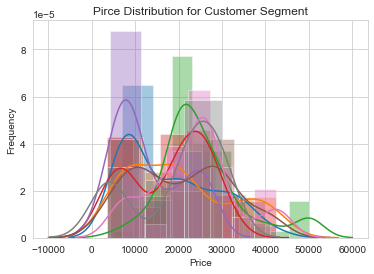

In [132]:
for i in info_price:
    sns.distplot(i)
plt.title('Pirce Distribution for Customer Segment')
plt.xlabel('Price')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

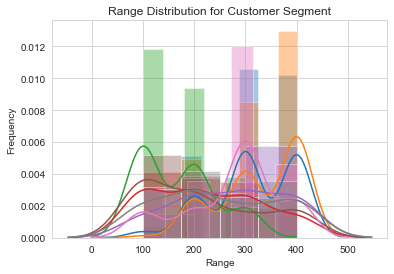

In [133]:
for i in info_range:
    sns.distplot(i)
plt.title('Range Distribution for Customer Segment')
plt.xlabel('Range')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

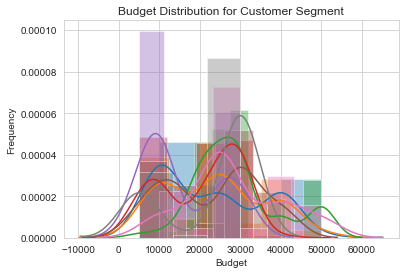

In [134]:
for i in info_budget:
    sns.distplot(i)
plt.title('Budget Distribution for Customer Segment')
plt.xlabel('Budget')
plt.ylabel('Frequency')

### Hypothesis Testing with Kruskal - Testing Distributions for two or more populations

H0 = Two or more population distributions have the same distribution
Ha = At least one has different distributions

In [46]:
from scipy.stats import kruskal #one way Non-parametric ANOVA 
stat, p = kruskal(*info_range)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('The same distribution')
else:
    print('Different distributions')

stat=167.522, p=0.000
Different distributions


In [47]:
stat, p = kruskal(*info_price)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('The same distribution')
else:
    print('Different distributions')

stat=48.088, p=0.000
Different distributions


In [83]:
stat, p = kruskal(*info_budget)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('The same distribution')
else:
    print('Different distributions')

stat=49.533, p=0.000
Different distributions


# Conclusion
* Customers were segemented based on their Characteristics: Socieconomic background, Electric Vehicle Charging Infrastructure, Vehicle Usage Behavior
* Identified total of 27 Different Segments related to Customer's information -> Computation was done to analyze what would be the contributing factors for their purchase decison (Either Electric Vehicle or Gasoline based)
* Instead of using the library, we have mannually created a function that calculates Naive Bayes Classifier, This method allows us to visualize the specific condition. 
* Extraction of samples from each clusters were made that had the highest percentage of the buy choice being Purchasing of the Electric vehicle.
* We have identified that those high percentage groups were having specific characteristics in terms of their features
* Hypothesis testing was done to verify that each cluster had different preference towards their buying choice 